In [2]:
# instalação de bibliotecas
!pip install -U pymoo

     |████████████████████████████████| 3.7MB 3.6MB/s 
     |████████████████████████████████| 245kB 42.4MB/s 
  Created wheel for pymoo: filename=pymoo-0.4.2.1-cp36-cp36m-linux_x86_64.whl size=1344738 sha256=4e5b4c9e9c3bb87119fb78542f894c25c5d6fad5da609c77d6a869da4ae802c4
  Stored in directory: /root/.cache/pip/wheels/24/1a/15/c95ef6c978305899c8b374fd3a36dd494a46a63b2b32c6c5c5
Successfully built pymoo


hv 1.4508608168689812
IGD  0.09267235224536108


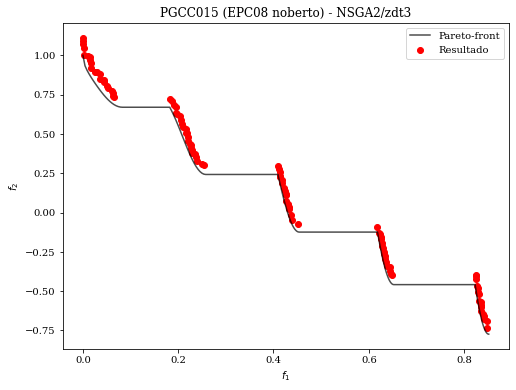

In [10]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC08 - 10/12/2020
# Algoritmos Evolutivos: Problema  de  Otimização  Multiobjetivo
# ==================================================================

# import general libs
import math
import random
import logging
import numpy as np
import pandas as pd

# import pymoo
from pymoo.optimize import minimize
from pymoo.interface import mutation,crossover
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_selection, get_problem, get_termination, get_sampling, get_crossover, get_mutation, get_performance_indicator
from pymoo.visualization.scatter import Scatter
from pymoo.util.plotting import plot
from pymoo.model.problem import Problem
from pymoo.performance_indicator.hv import Hypervolume

# descomentar para gerar relatórios:
problem_name="zdt1"
#problem_name="zdt2" 
#problem_name="zdt3"

problem = get_problem(problem_name)
algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_random"),
                  crossover=get_crossover("real_sbx",prob=0.9),
                  mutation=get_mutation("real_pm", prob=0.5),
                  eliminate_duplicates=True
                  )

termination = get_termination('n_gen', 250)
pf = problem.pareto_front()
res = minimize(problem,
              algorithm,
              termination,
              pf = pf,
              seed=1,
              verbose=False)

A = pf[::10] * 1.1
hv = get_performance_indicator("hv", ref_point=np.array([1.2, 1.2]))
print("hv", hv.calc(A))

igd = get_performance_indicator("igd", pf)
print("IGD ", igd.calc(A))

title = "PGCC015 (EPC08 noberto) - NSGA2/"+problem_name
plot = Scatter(legend=True,title=title)
plot.add(pf, plot_type="line", color="black", alpha=0.7, label="Pareto-front")
plot.add(res.F, color="red", label="Resultado")
plot.show()